In [118]:
from geopy import distance
import pandas as pd
from scipy.spatial.distance import cdist
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#Scikit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR


import warnings
warnings.filterwarnings("ignore")

In [122]:
climate_df = pd.read_csv('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/data/climate_forest_reclean_FINAL.csv')
climate_df.drop(climate_df.columns[[0]], axis = 1, inplace = True)


climate_df.columns

Index(['mod_ID', 'hist_id', 'PLOT', 'INVYR', 'hist_town', 'hist_location',
       'mod_location', 'closest', 'mod_distance', 'oaks.wt', 'whiteOak',
       'swampWhiteOak', 'redOak', 'chestnutOak', 'blackOak', 'hist_latitude',
       'LAT', 'closest_climate_position', 'avg_tair_1811', 'avg_tair_2009',
       'avg_qair_1811', 'avg_qair_2009', 'avg_psurf_1811', 'avg_psurf_2009',
       'avg_precipf_1811', 'avg_precipf_2009', 'total_FIA_oak'],
      dtype='object')

In [123]:
np.linspace(min_long, max_long, num=7)


array([41.11      , 42.11683333, 43.12366667, 44.1305    , 45.13733333,
       46.14416667, 47.151     ])

In [124]:
##Add zones 

min_long = min(climate_df['hist_latitude'])
max_long = max(climate_df['hist_latitude'])


zones = list(np.linspace(min_long, max_long, num=7))

climate_df['latitude_zone'] = 0

for val in zones:
    climate_df['latitude_zone'].loc[climate_df['hist_latitude'] >= val] = zones.index(val)+1
climate_df['latitude_zone'].value_counts()

3    407
4    399
2    391
5    249
1    198
6    161
7     12
Name: latitude_zone, dtype: int64

In [125]:
climate_df.columns
climate_df[['redOak','blackOak', 'whiteOak', 'oaks.wt', 'total_FIA_oak']].mean()

redOak           0.042173
blackOak         0.007344
whiteOak         0.008585
oaks.wt          0.090391
total_FIA_oak    0.058102
dtype: float64

In [15]:
climate_df
#need to 1hot encode X 
X_col = ['avg_tair_2009','avg_qair_2009','avg_psurf_2009','avg_precipf_2009','total_FIA_oak', 'latitude_zone']

y_target_red = 'redOak'
y_target_white = 'whiteOak'
y_target_black = 'blackOak'

X_data = climate_df[X_col]

y_red_data = climate_df[y_target_red]
y_white_data = climate_df[y_target_white]
y_black_data = climate_df[y_target_black]

In [97]:
# One-hot encoding multiple columns



transformer = make_column_transformer(
    (OneHotEncoder(), ['latitude_zone']),
    remainder='passthrough')

transformed = transformer.fit_transform(X_data)
X_1hot = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_1hot #i dont think we want to standardize 1 hot encoded features

,onehotencoder__x0_1,onehotencoder__x0_2,onehotencoder__x0_3,onehotencoder__x0_4,onehotencoder__x0_5,onehotencoder__x0_6,onehotencoder__x0_7,avg_tair_2009,avg_qair_2009,avg_psurf_2009,avg_precipf_2009,total_FIA_oak
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,283.028599,0.005680,99667.431394,0.000038,0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,281.173560,0.005292,99552.710172,0.000039,0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,281.173560,0.005292,99552.710172,0.000039,0.905459
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,281.173560,0.005292,99552.710172,0.000039,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,281.173560,0.005292,99552.710172,0.000039,0.629414
...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.0,0.0,0.0,1.0,0.0,0.0,0.0,278.357757,0.004836,98253.008626,0.000040,0.000000
1813,0.0,0.0,0.0,1.0,0.0,0.0,0.0,278.357757,0.004836,98253.008626,0.000040,0.000000
1814,0.0,0.0,0.0,1.0,0.0,0.0,0.0,278.357757,0.004836,98253.008626,0.000040,0.000000
1815,0.0,0.0,0.0,1.0,0.0,0.0,0.0,278.357757,0.004836,98253.008626,0.000040,0.000000


In [69]:
standardize_col = ['avg_tair_2009','avg_qair_2009','avg_psurf_2009','avg_precipf_2009','total_FIA_oak']


# for col in standardize_col:
#     X_1hot[col] = stats.zscore(X_1hot[col])
# X_1hot

,onehotencoder__x0_1,onehotencoder__x0_2,onehotencoder__x0_3,onehotencoder__x0_4,onehotencoder__x0_5,onehotencoder__x0_6,onehotencoder__x0_7,avg_tair_2009,avg_qair_2009,avg_psurf_2009,avg_precipf_2009,total_FIA_oak
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.340597,1.656613,1.590545,-0.170813,-0.389929
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.296505,0.629125,1.395083,0.122723,-0.389929
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.296505,0.629125,1.395083,0.122723,5.686692
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.296505,0.629125,1.395083,0.122723,-0.389929
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.296505,0.629125,1.395083,0.122723,3.834123
...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.288344,-0.580133,-0.819351,0.366310,-0.389929
1813,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.288344,-0.580133,-0.819351,0.366310,-0.389929
1814,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.288344,-0.580133,-0.819351,0.366310,-0.389929
1815,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.288344,-0.580133,-0.819351,0.366310,-0.389929


In [18]:
def GeneratePolynomialFeatures(X, polydegree):  
    poly = PolynomialFeatures(polydegree)
    polynomial_x = poly.fit_transform(X)
    return polynomial_x

In [19]:
polydegree = 4
polynomial_x = GeneratePolynomialFeatures(X_1hot, polydegree)
print (polynomial_x.shape)
print(polynomial_x)


x_train, x_test, y_train, y_test = model_selection.train_test_split(polynomial_x, y_red_data, test_size=0.2, random_state=0)

clf = LinearRegression().fit(x_train, y_train)
print(clf.score(x_test,y_test))


(1817, 1820)
[[ 1.00000000e+00  1.00000000e+00  0.00000000e+00 ...  4.43624674e-03
   1.01269726e-02  2.31176444e-02]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00 ...  2.28993563e-03
  -7.27584481e-03  2.31176444e-02]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00 ...  4.87047054e-01
   2.25686144e+01  1.04577648e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.04018031e-02
  -2.17173118e-02  2.31176444e-02]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.04018031e-02
  -2.17173118e-02  2.31176444e-02]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.04018031e-02
  -2.17173118e-02  2.31176444e-02]]
-4.28589668304289e+19


In [20]:
def train_test_standardize(X_1hot, y, standardize_col):
    #split
    x_train, x_test, y_train, y_test = model_selection.train_test_split(X_1hot, y_red_data, test_size=0.2)
    
    #normalize and apply non 1hot columns
    normalizer = preprocessing.Normalizer()
    x_train[standardize_col] = normalizer.fit_transform(x_train[standardize_col])
    x_test[standardize_col] = normalizer.transform(x_test[standardize_col])
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_standardize(X_1hot, y_red_data, standardize_col)

print(x_train)
print(x_test)

      onehotencoder__x0_1  onehotencoder__x0_2  onehotencoder__x0_3  \
256                   0.0                  0.0                  0.0   
1607                  0.0                  1.0                  0.0   
322                   0.0                  0.0                  0.0   
1713                  0.0                  0.0                  0.0   
483                   0.0                  0.0                  0.0   
...                   ...                  ...                  ...   
691                   0.0                  0.0                  0.0   
1364                  1.0                  0.0                  0.0   
430                   0.0                  0.0                  0.0   
46                    1.0                  0.0                  0.0   
1322                  0.0                  1.0                  0.0   

      onehotencoder__x0_4  onehotencoder__x0_5  onehotencoder__x0_6  \
256                   1.0                  0.0                  0.0   
1607 

# Polynomial Linear Predictions

In [21]:
#generate
poly_x= GeneratePolynomialFeatures(X_1hot, 2)

#split
x_train1, x_test1, y_train1, y_test1 = model_selection.train_test_split(poly_x, y_red_data)

#normalzie
normalizer = preprocessing.Normalizer()
x_train1= normalizer.fit_transform(x_train)
x_test1 = normalizer.transform(x_test)
print(x_train1.sum().sum())
print(x_test1.sum().sum())

766.5228981750001
207.8872975751303


In [22]:
#split
#normalize
x_train, x_test, y_train, y_test = train_test_standardize(X_1hot, y_red_data, standardize_col)

#create n polynomial features 
poly_x_train = GeneratePolynomialFeatures(x_train, 2)
print(poly_x_train.sum().sum())
poly_x_test = GeneratePolynomialFeatures(x_test, 2)
print(poly_x_test.sum().sum())

5660.292551042843
1337.7640213569166


(1453, 91)
(364, 91)
(1453, 455)
(364, 455)
(1453, 1820)
(364, 1820)
[0.8047054947013389, 0.7629088548729773, 0.7271980948435703]
Max score of 0.8047054947013389 found with poly degree of 2


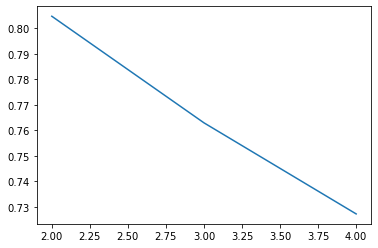

In [98]:
def poly_predict_hist_trees(X, target_data):
    #input:
    #output: max r2 score with poly degree
    standardize_col = ['avg_tair_2009','avg_qair_2009','avg_psurf_2009','avg_precipf_2009','total_FIA_oak']

    polydegree = [2, 3, 4]
    poly_scores = []
    
    for n in range(len(polydegree)): #for each degree
    
        #split poly feature set
        #_train, x_test, y_train, y_test = model_selection.train_test_split(polynomial_x, target_data, test_size=0.2, random_state=0)
        x_train, x_test, y_train, y_test = train_test_standardize(X, target_data, standardize_col)
        
        #create n polynomial features 
        poly_x_train = GeneratePolynomialFeatures(x_train, polydegree[n])
        poly_x_test = GeneratePolynomialFeatures(x_test, polydegree[n])
        print(poly_x_train.shape)
        print(poly_x_test.shape)
        #fit to model
        clf = LinearRegression().fit(x_train, y_train)
    
        #r^2 score and store
        poly_scores.append(clf.score(x_test,y_test))
    
    plt.plot(np.linspace(min(polydegree), max(polydegree), num=len(polydegree)), poly_scores )
    print(poly_scores)
    print(f"Max score of {max(poly_scores)} found with poly degree of {polydegree[poly_scores.index(max(poly_scores))]}")
    #np.linspace(min(polydegree), max(polydegree), num=len(polydegree))
    
poly_predict_hist_trees(X_1hot, y_black_data)

In [24]:
poly_predict_hist_trees(y_white_data)

TypeError: poly_predict_hist_trees() missing 1 required positional argument: 'target_data'

In [25]:
poly_predict_hist_trees(y_black_data)

TypeError: poly_predict_hist_trees() missing 1 required positional argument: 'target_data'

# Decision Tree 

In [54]:
def dtree_predict_hist_trees(X, target_data,title):
    
    #split feature set
    polydegree = [1,2, 3, 4]
    poly_scores = []
    
    for n in range(len(polydegree)): #for each degree
    
        #split poly feature set
        #_train, x_test, y_train, y_test = model_selection.train_test_split(polynomial_x, target_data, test_size=0.2, random_state=0)
        x_train, x_test, y_train, y_test = train_test_standardize(X, target_data, standardize_col)
        
        #create n polynomial features 
        poly_x_train = GeneratePolynomialFeatures(x_train, polydegree[n])
        poly_x_test = GeneratePolynomialFeatures(x_test, polydegree[n])

        clf = DecisionTreeRegressor().fit(poly_x_train,y_train)

        #r^2 score and store
        poly_scores.append(clf.score(poly_x_test,y_test))
    return max(poly_scores)

#     y_pred = clf.predict(x_test)

#     fig, ax = plt.subplots(1, 1, figsize = (8,8))

#     ax.plot(np.arange(len(y_pred)), y_pred, color = 'red' ,label = 'Predicted Test Value')
#     ax.scatter(np.arange(len(y_test)), y_test, color = 'blue' ,label = 'Actual Test Value')
#     ax.set_title(f'{title} Decision Tree Results', fontsize = 15)
#     ax.set_xlabel('Test Point', fontsize = 15)
#     ax.set_ylabel('Test Value', fontsize = 15)
#     ax.legend()
    
#     plt.show()
    
dtree_predict_hist_trees(X_1hot, y_black_data, 'Decision Tree on Black Oak Prediction')

0.7322352774851029

In [27]:
dtree_predict_hist_trees(X_1hot, y_red_data, 'Decision Tree on Red Oak Prediction')

0.8221195303452736

In [28]:
dtree_predict_hist_trees(X_1hot, y_white_data, 'Decision Tree on White Oak Prediction')

0.6539425205793121

# Ridge

In [66]:
def poly_ridge_predict_hist_trees(X, target_data, columns_to_norm):
    #input:
    #output: max r2 score with poly degree
    standardize_col = columns_to_norm

    polydegree = [1, 2, 3, 4]
    poly_scores = []
    best_clf = None
    #find best alpha
    
    #alpha = list(np.linspace(.01,1,20).round(2))
    alpha = [0]
    max_score = 0
    best_alpha = 0
    for a in alpha:

        for n in range(len(polydegree)): #for each degree
    
            #split poly feature set
            x_train, x_test, y_train, y_test = train_test_standardize(X, target_data, columns_to_norm)
        
            #create n polynomial features 
            poly_x_train = GeneratePolynomialFeatures(x_train, polydegree[n])
            poly_x_test = GeneratePolynomialFeatures(x_test, polydegree[n])

            #fit to model
            #clf = Ridge(alpha=a).fit(poly_x_train, y_train)
            clf = LinearRegression().fit(poly_x_train, y_train)
        #r^2 score and store
            score = clf.score(poly_x_test,y_test)
            poly_scores.append(score)
            if score > max_score:
                max_score = score
                best_alpha = a
                best_clf = clf
                best_poly = polydegree[n]
    
    #return list_of_models[poly_scores.index(max(poly_scores))]
    return [max(poly_scores), best_clf, best_poly]
    
poly_ridge_predict_hist_trees(X_1hot, y_red_data)


[0.7254051418055363, LinearRegression(), 1]

In [72]:
##black oak
black_score_list = []
white_score_list = []
red_score_list = []

black_model_list = []
white_model_list = []
red_model_list = []

black_poly_list = []
white_poly_list = []
red_poly_list = []

for i in range(0,100):
    black_run = poly_ridge_predict_hist_trees(X_1hot, y_black_data, standardize_col)
    white_run = poly_ridge_predict_hist_trees(X_1hot, y_white_data, standardize_col)
    red_run = poly_ridge_predict_hist_trees(X_1hot, y_red_data, standardize_col)
    print(black_run)
    
    black_score_list.append(black_run[0])
    white_score_list.append(white_run[0])
    red_score_list.append(red_run[0])

    black_model_list.append(black_run[1])
    white_model_list.append(white_run[1])
    red_model_list.append(red_run[1])

    black_poly_list.append(black_run[2])
    white_poly_list.append(white_run[2])
    red_poly_list.append(red_run[2])

[0.7730234538982551, LinearRegression(), 3]
[0.7793471022241274, LinearRegression(), 2]
[0.7559983350681307, LinearRegression(), 2]
[0.6986445055813273, LinearRegression(), 1]
[0.7257370360960855, LinearRegression(), 3]
[0.7752555209877846, LinearRegression(), 2]
[0.7238930706247385, LinearRegression(), 2]
[0.7845171794556721, LinearRegression(), 2]
[0.7386798830449248, LinearRegression(), 2]
[0.601811867392619, LinearRegression(), 1]
[0.788421960904853, LinearRegression(), 3]
[0.7850489610560643, LinearRegression(), 2]
[0.7526999104746593, LinearRegression(), 2]
[0.6772693973962345, LinearRegression(), 2]
[0.7237944250167636, LinearRegression(), 1]
[0.6988708544148653, LinearRegression(), 2]
[0.6988391174837978, LinearRegression(), 2]
[0.6442929300913315, LinearRegression(), 1]
[0.6360803875607791, LinearRegression(), 1]
[0.7894436809322731, LinearRegression(), 3]
[0.8396918875443242, LinearRegression(), 3]
[0.6923647443399892, LinearRegression(), 1]
[0.6789780833638502, LinearRegress

black oak: 0.733
white oak 0.741
red oak 0.731
LinearRegression()
2
1817 len hist x
[-6.74156428e+21 -6.72390741e+21 -6.72390741e+21 ... -6.54300739e+21
 -6.54300739e+21 -6.54300739e+21]
[-5.11381434e+24 -5.09371259e+24 -5.09368531e+24 ... -4.88974474e+24
 -4.88974474e+24 -4.88974474e+24]
[7.82075724e+21 7.80027384e+21 7.80027384e+21 ... 7.59041526e+21
 7.59041526e+21 7.59041526e+21]


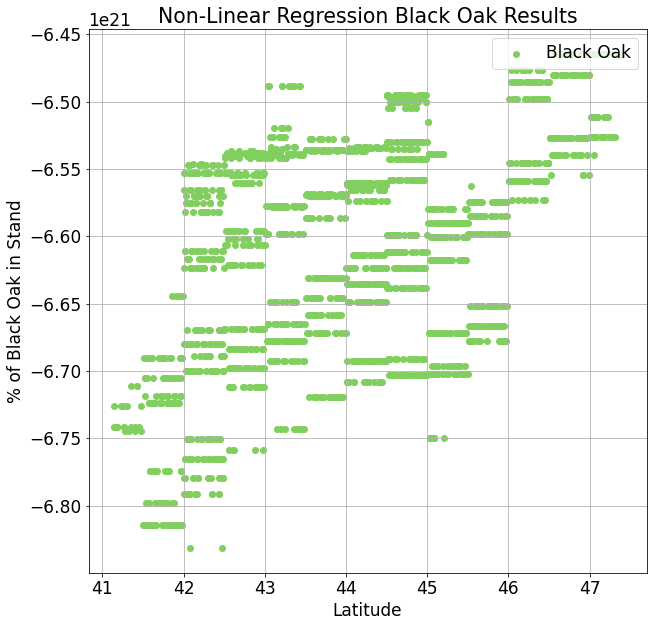

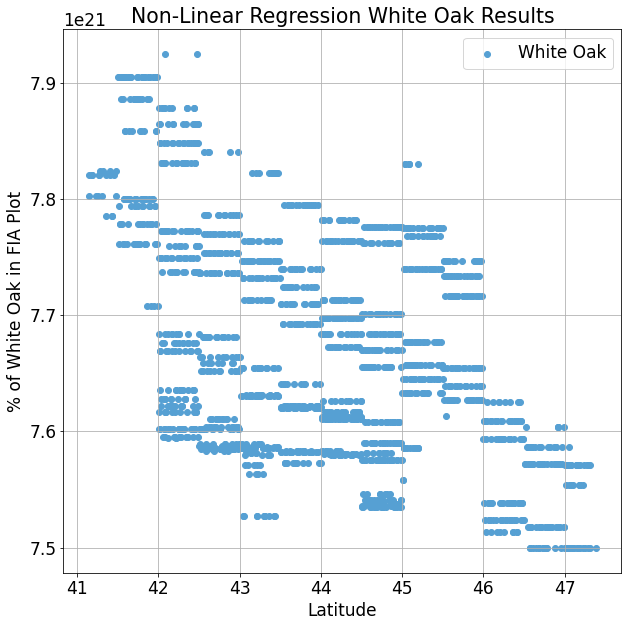

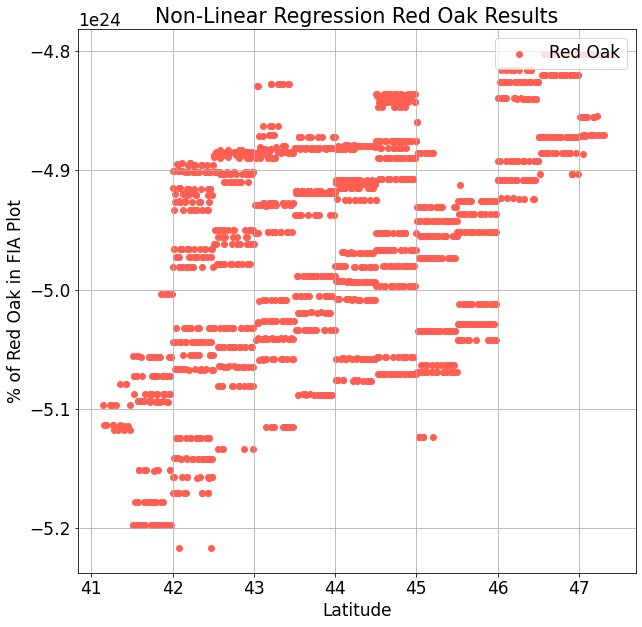

In [135]:
print('black oak:',np.mean(black_score_list).round(3))
print('white oak',np.mean(white_score_list).round(3))
print('red oak', np.mean(red_score_list).round(3))

max_black_score = max(black_score_list)
max_black_index = black_score_list.index(max_black_score)
best_black_model = black_model_list[max_black_index]
black_model_poly = black_poly_list[max_black_index]

max_white_score = max(white_score_list)
max_white_index = white_score_list.index(max_white_score)
best_white_model = white_model_list[max_white_index]
white_model_poly = white_poly_list[max_white_index]

max_red_score = max(red_score_list)
max_red_index = red_score_list.index(max_red_score)
best_red_model = red_model_list[max_red_index]
red_model_poly = red_poly_list[max_red_index]

print(best_black_model)
print(black_model_poly)


#get hist data to push through models
hist_col = ['avg_tair_1811','avg_qair_1811','avg_psurf_1811','avg_precipf_1811','oaks.wt', 'latitude_zone']

hist_X = climate_df[hist_col]
print(len(hist_X), 'len hist x')
#one hot encode hist data
transformer = make_column_transformer(
    (OneHotEncoder(), ['latitude_zone']),
    remainder='passthrough')

transformed = transformer.fit_transform(hist_X)
hist_X = pd.DataFrame(transformed, columns=transformer.get_feature_names())


black_hist_X = GeneratePolynomialFeatures(hist_X, black_model_poly)
black_model = best_black_model.predict(black_hist_X)

white_hist_X = GeneratePolynomialFeatures(hist_X, white_model_poly)
white_model = best_white_model.predict(white_hist_X)

red_hist_X = GeneratePolynomialFeatures(hist_X, red_model_poly)
red_model = best_red_model.predict(red_hist_X)

print(black_model)
print(red_model)
print(white_model)

##Black Oak
plt.rc('font', size=17)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x =climate_df['LAT'], y = black_model, label = 'Black Oak', color='#81cf5f')

ax.set_title('Non-Linear Regression Black Oak Results')
ax.set_ylabel('% of Black Oak in Stand')
ax.set_xlabel('Latitude')
ax.legend()
ax.grid(True)
plt.legend(loc='upper right')
plt.show()

#White Oak
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.scatter(x = climate_df['LAT'], y = white_model, label = 'White Oak', color='#56a0d3')

ax.set_title('Non-Linear Regression White Oak Results')
ax.set_ylabel('% of White Oak in FIA Plot')
ax.set_xlabel('Latitude')
ax.legend()
ax.grid(True)
plt.legend(loc='upper right')
plt.show()

#red Oak
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.scatter(x =  climate_df['LAT'], y =red_model, label = 'Red Oak', color='#ff5e52')

ax.set_title('Non-Linear Regression Red Oak Results')
ax.set_ylabel('% of Red Oak in FIA Plot')
ax.set_xlabel('Latitude')
ax.legend()
ax.grid(True)
plt.legend(loc='upper right')
plt.show()


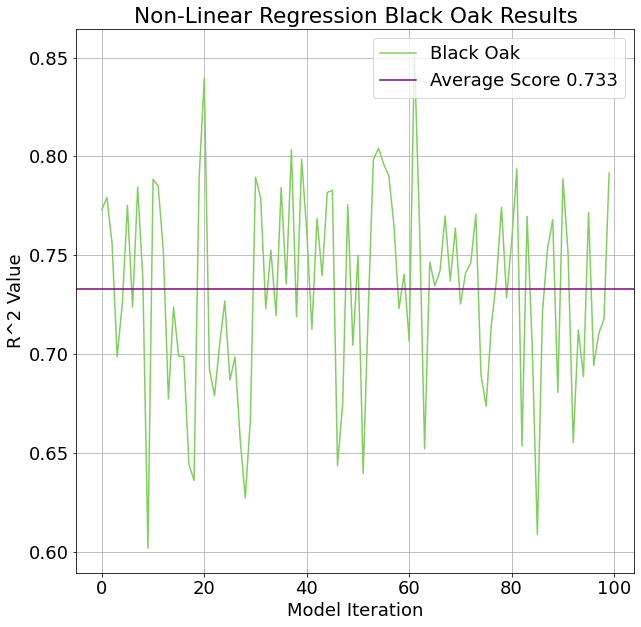

<Figure size 432x288 with 0 Axes>

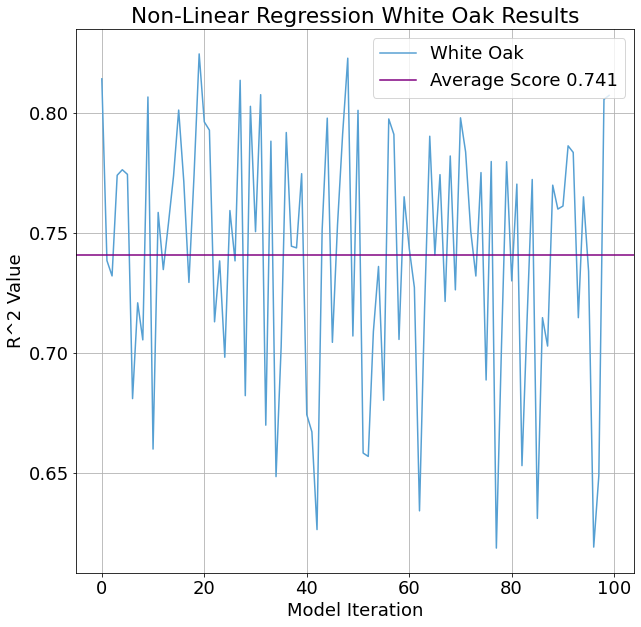

<Figure size 432x288 with 0 Axes>

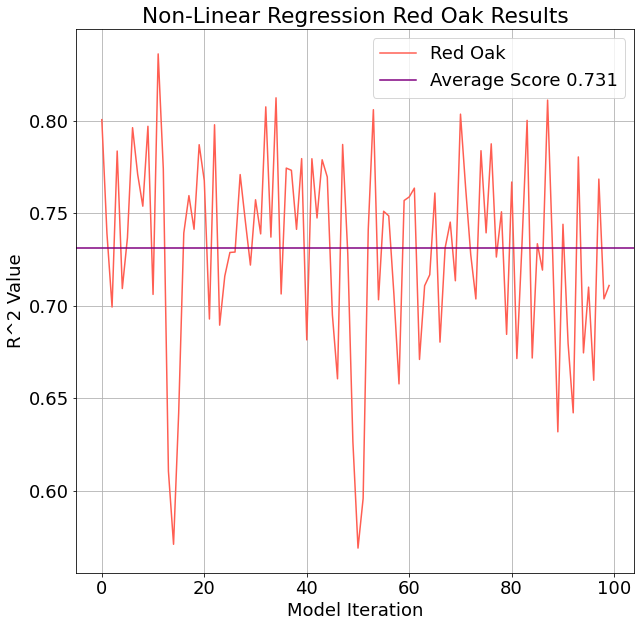

<Figure size 432x288 with 0 Axes>

In [132]:
##Black Oak
plt.rc('font', size=18)

fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(black_score_list, label = 'Black Oak', color='#81cf5f')

ax.set_title('Non-Linear Regression Black Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(black_score_list), label = f'Average Score {np.mean(black_score_list).round(3)}', color = 'purple')
plt.legend(loc='upper right')
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/poly_ridge_black.png', bbox= 'tight')
#White Oak
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(white_score_list, label = 'White Oak', color='#56a0d3')
ax.set_title('Non-Linear Regression White Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(white_score_list), label = f'Average Score {np.mean(white_score_list).round(3)}', color = 'purple')
plt.legend()
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/poly_ridge_white.jpg')

fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(red_score_list, label = 'Red Oak', color='#ff5e52')
ax.set_title('Non-Linear Regression Red Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(red_score_list), label = f'Average Score {np.mean(red_score_list).round(3)}', color = 'purple')
plt.legend()
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/poly_ridge_red.jpg')


In [78]:
def svm_hist_trees(X, target_data):
    standardize_col = ['avg_tair_2009','avg_qair_2009','avg_psurf_2009','avg_precipf_2009','total_FIA_oak']
    
    polydegree = [1, 2, 3, 4]
    poly_scores = []
    max_score = 0
    best_clf = None
    
    for n in range(len(polydegree)):
        x_train, x_test, y_train, y_test = train_test_standardize(X, target_data, standardize_col)
    
        clf = LinearSVR(random_state=0, tol=1e-5).fit(x_train, y_train)
        score = clf.score(x_test,y_test)
    
        if score > max_score:
            max_score = score
            best_clf = clf
            best_poly = polydegree[n]
    return score

svm_black_score_list = []
svm_white_score_list = []
svm_red_score_list = []


for i in range(0,100):
    svm_black_score_list.append(svm_hist_trees(X_1hot, y_black_data))
    svm_white_score_list.append(svm_hist_trees(X_1hot, y_white_data))
    svm_red_score_list.append(svm_hist_trees(X_1hot, y_red_data))

In [79]:
print('black oak:',np.mean(svm_black_score_list).round(3))
print('white oak',np.mean(svm_white_score_list).round(3))
print('red oak', np.mean(svm_red_score_list).round(3))

black oak: 0.606
white oak 0.604
red oak 0.604


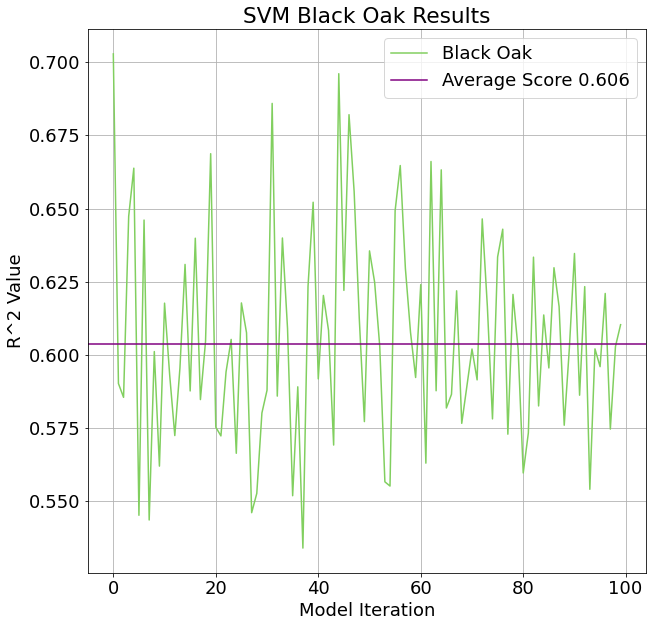

<Figure size 432x288 with 0 Axes>

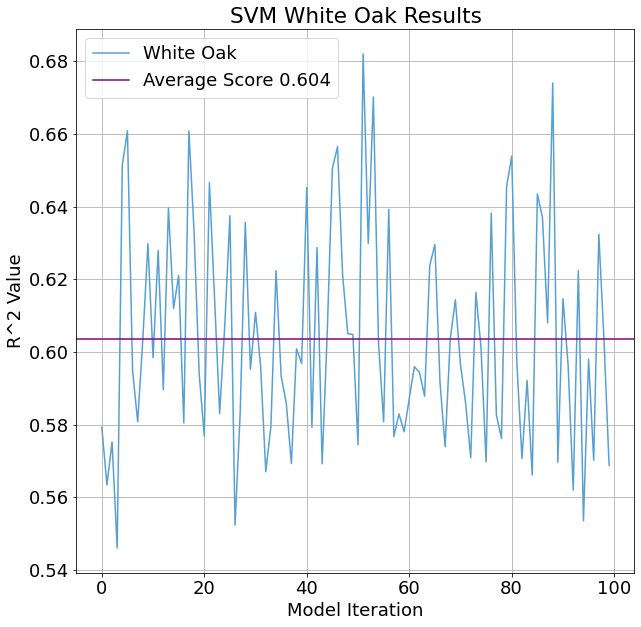

<Figure size 432x288 with 0 Axes>

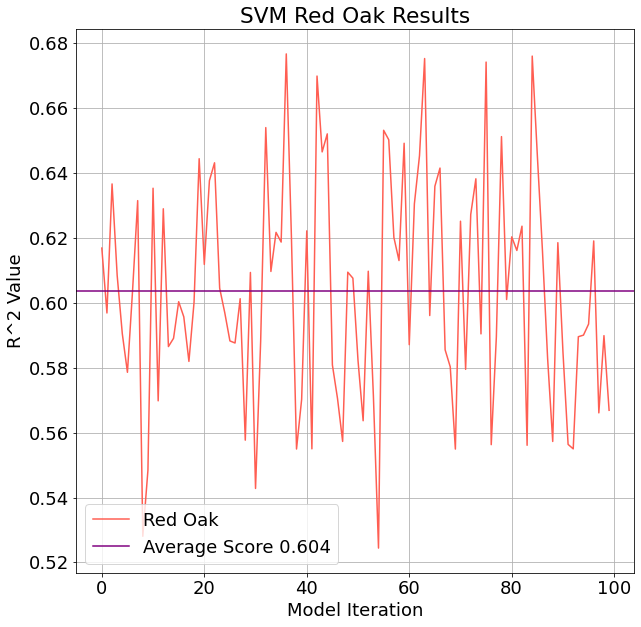

<Figure size 432x288 with 0 Axes>

In [133]:
##Black Oak
plt.rc('font', size=18)

fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(svm_black_score_list, label = 'Black Oak', color='#81cf5f')

ax.set_title('SVM Black Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(svm_red_score_list), label = f'Average Score {np.mean(svm_black_score_list).round(3)}', color = 'purple')
plt.legend()
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/svm_black.jpg')

#White Oak
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(svm_white_score_list, label = 'White Oak', color='#56a0d3')
ax.set_title('SVM White Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(svm_red_score_list), label = f'Average Score {np.mean(svm_white_score_list).round(3)}', color = 'purple')
plt.legend()
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/svm_white.jpg')

fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(svm_red_score_list, label = 'Red Oak', color='#ff5e52')
ax.set_title('SVM Red Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')
ax.legend()
ax.grid(True)
ax.axhline(y = np.mean(svm_red_score_list), label = f'Average Score {np.mean(svm_red_score_list).round(3)}', color = 'purple')
plt.legend()
plt.show()
plt.savefig('C:/Users/xavie/Desktop/UVM_Course_Work/Fall 2022/Machine_Learning/Final Project/figures/svm_red.jpg')


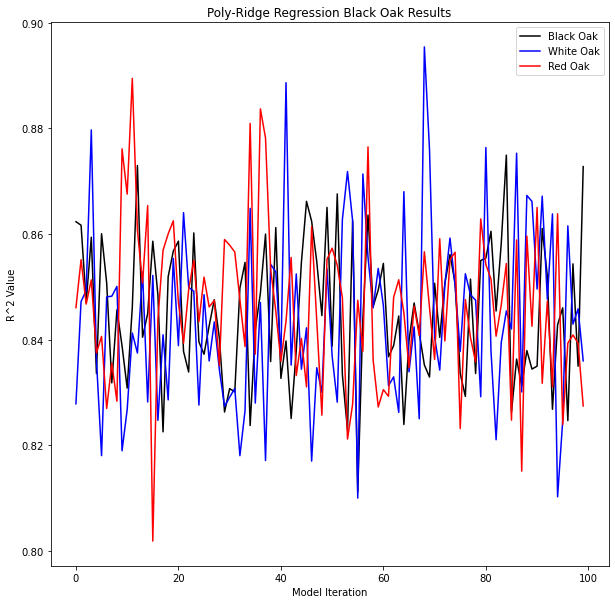

In [256]:
fig, ax = plt.subplots(1,1, figsize = (10,10))

ax.plot(black_score_list, label = 'Black Oak', color='black')
ax.plot(white_score_list, label = 'White Oak', color='blue')
ax.plot(red_score_list, label = 'Red Oak', color='red')

ax.set_title('Poly-Ridge Regression Black Oak Results')
ax.set_ylabel('R^2 Value')
ax.set_xlabel('Model Iteration')

plt.legend()